# 神经网络和机器学习之鸢尾花分类

案例说明：鸢尾花(Iris)分类，使用全连接神经网络层。

鸢(yuān)尾花分类相当于机器学习中的Helloworld问题。鸢尾花可以分为很多类，一般通过花萼长度、花萼宽度、花瓣长度、花瓣宽度进行区分。我们让机器来学习关于这个鸢尾花分类的一组数据，然后建立模型，训练。后面直接给出花的四个特征，让机器判断花的分类。

案例选择了keras框架，需要先安装keras和tensorflow。虚谷号教育版已经预装必要的库，可以直接使用。

本案例已经提供了训练好的模型，文件名称为：2-model-vv.h5。如果想直接测试模型，请跳到“导入模型”环节，输入数据开始识别。

## 1.环境搭建

下面是安装命令：

pip install keras

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

建议选择清华源，速度将快很多。参考命令如下：

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 2.数据准备


鸢尾花分类数据集在`data`中，文件名称为`iris.csv`。数据分为5列，前4列为花萼长度，花萼宽度，花瓣长度，花瓣宽度等4个用于识别鸢尾花的属性，第5列为鸢尾花的类别（包括Setosa，Versicolour，Virginica三类）。

这个数据集可以从UCI数据集上直接下载，具体地址为：http://archive.ics.uci.edu/ml/datasets/Iris
打开页面后点击Datafolder就可以下载到本地磁盘上，默认格式为逗号分隔的文本文件。

也可以直接从sklearn包里datasets里导入，语法为：from sklearn.datasets import load_iris。
如果从本地磁盘上读入该数据集，可以采用pandas包里的read_excel或者read_csv方法，也可以利用python里面的csv包来处理。

开始导入数据集吧。

In [1]:
import pandas as pd
data=pd.read_csv('./data/iris.csv')

该问题属于比较典型的多分类问题，因此在训练数据预处理中，首先对分类结果标签"Species"进行独热编码化。所谓独热编码(One-Hot)，是指用0/1构成的数组来表示一种情况，比如在鸢尾花分类中，顺序编码可以用0、1、2来表示不同的鸢尾花品种，而独热编码可以用[1,0,0]表示setosa，用[0,1,0]表示versicolor,用[0,0,1]表示virginica。独热编码相对于顺序编码避免了神经网络把没有数值大小意义的数据错误的理解为有数值意义。比如如果用顺序编码来表示鸢尾花品种，神经网络会错误的认为2表示的品种与0表示的品种之间的差距比较大，而与1表示的品种差距比较小。

In [2]:
data=pd.get_dummies(data,columns=['Species']) #把种类(列名称为“Species”)进行独热编码
x=data[['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']]
y=data.iloc[:,-3:]

此时x与y的形状分别是(150,3)和(150,1)，即x具有150行、4列，y具有150行、1列。其中x是输入的数据(鸢尾花的属性)，y是输出的结果(鸢尾花的类别)。
输出来看一下，你会发现x与y的行数一定是相同的。

In [3]:
# 输出data的数据开头5行
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [4]:
# 输出data的数据最后5行
data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


In [5]:
# 输出x数据的最后5行
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# 输出x、y的长度，肯定是一致的。
len(x),len(y)

(150, 150)

## 3.建立模型

多分类问题是二分类问题的扩展。当分类数大于2时，就是多分类问题。比如把笔分成铅笔、圆珠笔、钢笔等等，就是多分类问题。多分类问题需要神经网络将最后一层神经元个数设置为与分类数目相同以输出一个数组，这个数组的长度就是分类数目，数组中每个数值对应在不同类别上的可能性。一般的，多分类问题通过softmax函数激活，损失函数使用类别交叉熵损失(categorical_crossentropy)。

keras支持很多类型的神经网络层，这里使用add方法添加2个全连接神经网络层（Dense层）。
第一层通过input_dim参数指定接收输入数据的维度为4（鸢尾花的属性），units=8表示将这个4维数据全连接到8个神经元，activation定义了激活函数为relu。第二层神经元，也就是最后一层神经元的个数设置要和分类的数目相同，所以设置为3，激活函数为softmax。

代码如下：

In [7]:
import keras
from keras import layers

In [8]:
model=keras.models.Sequential()
model.add(layers.Dense(units=8, input_dim=4, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))

定义好模型的层之后，需要对模型进行编译，同时指定训练模型所需要的优化器以及损失的估算方法。在keras中，可以通过optimizer参数来指定优化器。这里选择了adam。loss定义了损失函数为category_crossentropy。

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy')

## 4.训练模型

最后对模型进行训练，一下代码利用现有数据x和y对模型进行训练500次，epochs表示训练轮次，batch_size表示每次有多少行数据参与训练，最后把整个训练过程记录到history中。程序运行后，在控制台会打印出每轮次的训练情况。

In [10]:
history=model.fit(x,y,batch_size=150,epochs=500)

Epoch 1/500
1/1 [==============================] - 15s 15s/step - loss: 5.0220
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 4.9722
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 4.9225
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 4.8728
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 4.8231
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 4.7735
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 4.7240
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 4.6746
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 4.6253
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 4.5762
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 4.5271
Epoch 12/500
1/1 [==============================] - 0s 31ms/step - loss: 4.4783
Epoch 13/500
1/1 [==============================] - 0s 7ms/

一开始loss非常大，而随着训练不断的进行，loss在逐渐减小。将history中的数据通过matplotlib绘图表现出来，就非常直观了。因为在jupyter上调试，我加入%matplotlib inline命令。

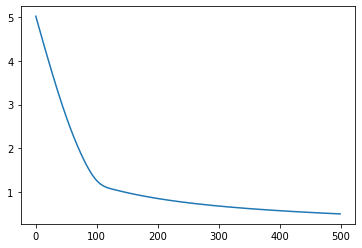

In [11]:
#将图片内嵌在交互窗口，而不是弹出一个图片窗口
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(range(500),history.history['loss'])

我们如何评价一个模型训练是否成功？首先，训练过程中训练集loss要下降到一个较小的值，表示模型收敛较好，没有欠拟合；其次，测试集loss最后与训练集loss要尽可能相似，差距越小越好小，说明该模型没有过拟合。

模型成功训练出来后，便可以使用该模型对输入的鸢尾花数据，判断是属于哪一种类别了。这里选择一个最简单的部分，随机读取数据集中的几条数据，看看这个模型会输出什么结果。

我们可以在数据集中随机选择几条，略作修改后进行测试。看看输出的结果对不对。

In [13]:
data=pd.read_csv('./iris.csv')
data=data.sample(frac=1).reset_index(drop=True)   #打乱数据的先后顺序
x_input=data.iloc[:,0:-1]
x_input=x_input[:5]
data[:5].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.4,1.5,0.2,Iris-setosa
1,6.1,2.8,4.0,1.3,Iris-versicolor
2,5.5,3.5,1.3,0.2,Iris-setosa
3,4.8,3.0,1.4,0.3,Iris-setosa
4,5.5,2.4,3.8,1.1,Iris-versicolor


In [14]:
model.predict(x_input)

array([[0.85509336, 0.10326692, 0.04163969],
       [0.16691774, 0.46382022, 0.36926198],
       [0.916014  , 0.06202741, 0.02195866],
       [0.8281539 , 0.1237003 , 0.04814569],
       [0.16936547, 0.4697294 , 0.36090508]], dtype=float32)

这里的数据是按照“Species_Iris-setosa，Species_Iris-versicolor，Species_Iris-virginica”来排序的。模型输出的数据中，每一列都是估算，哪一列数据大，我们就选择哪一个分类结果。

如果发现不准确，我们继续训练一下模型，即再运行几次，等到loss的值没有显著变化的时候，再来测试模型。一般来说，只要loss值到达0.1左右，识别效果就很不错了。

## 5.模型的保存和导入

**5.1.模型保存**

使用save可以保存训练好的模型，下次导入即可使用。

In [15]:
model.save('./model/model-5-28.h5')   # HDF5文件

**5.2.模型导入**

使用keras.models的load_model语句载入模型，就可以直接用这个模型来做预测了。

In [1]:
from keras.models import load_model
import pandas as pd
model = load_model('./model/model-5-28.h5')

**5.3.模型应用**

输入数据，然后利用模型的predict方法得到预测结果。

注：一些教程中常常看到的“predict_classes”已经弃用。

In [2]:
#请输入数据，如：5.5,2.6,4.4,1.2
s=input("请输入数据，用“,”分开:")

请输入数据，用“,”分开: 5.5,2.6,4.4,1.2


In [3]:
# 将输入的数据分割为列表
i_data=s.split(',')
i_data

['5.5', '2.6', '4.4', '1.2']

In [4]:
# 转换列表的所有元素为float类型
i_data=list(map(float,i_data))
i_data

[5.5, 2.6, 4.4, 1.2]

In [5]:
#生成一个空的DataFrame，将输入的列表添加为新行
x=pd.DataFrame(columns=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'])
x.loc[0]=i_data

In [6]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.5,2.6,4.4,1.2


In [7]:
# 输入并预测
model.predict(x)

array([[0.06928474, 0.45517582, 0.47553945]], dtype=float32)

从结果可以看出，概率最大的是最后一类。

In [8]:
#用“np.argmax”将直接输出概率最大的一项
import numpy as np
np.argmax(model.predict(x), axis=-1)

array([2])

## 6.利用自带数据集

这一部分的内容用于参考，可以和前面的方法对比一下。

参考资料：https://keras.io/zh/

**6.1.数据导入**

sklearn自带了iris数据集，即导入sklearn.datasets。要从网络下载数据的，第一次使用，要等一会儿。

In [9]:
import keras
from keras import layers
from sklearn.datasets import load_iris
i_data = load_iris()
print(i_data.feature_names)
print(i_data.target_names)
x = i_data.data
y = i_data.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


**6.2.数据预处理**

Scikit-Learn已经帮我们把类别编码成了数字，不过是一维数组（None, ）（样本的个数不固定，用None表示），而Keras多分类接受的类别输入是一个二维数组，是y的one-hot编码形式。one-hot编码，简单来讲，就是将原来由0开始的类别值转换成向量，比如3个类别0,1,2，那么类别向量长度为3，以原类别值作为位置索引，对应位置置为1，其它位置置为0，即类别0对应：[1, 0, 0]，类别1对应[0, 1, 0]，类别2对应[0, 0, 1]。全部转换后，y变为二维数组（None，3），可以打印前3行看看。

In [10]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, 3)
print(y.shape)
print(y[0:3, :])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


**6.3.定义模型（搭建神经网络）**

In [11]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
model.add(Dense(units=8, input_dim=4, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

**6.4.编译模型**

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**6.5.训练模型**

这段代码可以多运行几次，你会发现loss多值会越来越小。到了0.05后，变化就不大了。

In [13]:
history=model.fit(x, y, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 8s 2ms/step - loss: 2.1136 - accuracy: 0.3469
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 1.9307 - accuracy: 0.3190
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 1.6638 - accuracy: 0.3339
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.4534 - accuracy: 0.2622
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 1.2676 - accuracy: 0.2192
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0622 - accuracy: 0.2964
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.9714 - accuracy: 0.2557
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.2493
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.4591
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7734 - accuracy: 0.6383
Epoch 11/

History对象会被模型的fit方法返回。用dir(history)的方式，可以得到History对象的所有属性，用vars(history)能够看到所有的属性值。

具体可以参考：https://keras.io/zh/callbacks/#history

In [14]:
# 输出所有的loss
history.history['loss']

[2.1244957447052,
 1.7910242080688477,
 1.5408719778060913,
 1.3443976640701294,
 1.1806373596191406,
 1.0392695665359497,
 0.937523603439331,
 0.8605464696884155,
 0.8044152855873108,
 0.7702749371528625,
 0.750398576259613,
 0.7358033657073975,
 0.7212567329406738,
 0.7096283435821533,
 0.6989922523498535,
 0.6859288811683655,
 0.6757642030715942,
 0.6668028831481934,
 0.659077525138855,
 0.6491382718086243,
 0.6414797902107239,
 0.6334409713745117,
 0.6259604096412659,
 0.6181484460830688,
 0.6115184426307678,
 0.6047548651695251,
 0.5974271297454834,
 0.5902149677276611,
 0.5845476984977722,
 0.5769246816635132,
 0.5710497498512268,
 0.5641980171203613,
 0.5563315153121948,
 0.5511131286621094,
 0.5455443859100342,
 0.5356295108795166,
 0.5294861793518066,
 0.5241512656211853,
 0.5162819623947144,
 0.5101361870765686,
 0.5040771961212158,
 0.4975661635398865,
 0.49116846919059753,
 0.48496779799461365,
 0.47947564721107483,
 0.4742377698421478,
 0.46606943011283875,
 0.460970312356

**6.6.评估模型**

In [15]:
result = model.evaluate(x, y)
print(result[1])

5/5 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9733
0.9733333587646484


**6.7.模型预测**

predict输出概率矩阵，每一行对应预测值在三个类别上的概率，可以全部打印出来看一下。

**注意**：这里采用的是科学计数法。哪个数字小，就说明哪个概率最大。

In [16]:
proba = model.predict(x)
print(proba[0:150])

[[9.93398428e-01 6.60160091e-03 1.65872327e-09]
 [9.83572662e-01 1.64272822e-02 1.57033888e-08]
 [9.89965439e-01 1.00345090e-02 7.35242001e-09]
 [9.79231715e-01 2.07683034e-02 3.34529595e-08]
 [9.94261265e-01 5.73877571e-03 1.37241840e-09]
 [9.93492901e-01 6.50704652e-03 1.99003858e-09]
 [9.91097093e-01 8.90288875e-03 9.05162079e-09]
 [9.89982903e-01 1.00171268e-02 4.26628466e-09]
 [9.76297736e-01 2.37020869e-02 6.32534949e-08]
 [9.82232332e-01 1.77677032e-02 1.08878613e-08]
 [9.94691312e-01 5.30866161e-03 6.56002308e-10]
 [9.84799087e-01 1.52009372e-02 1.19210224e-08]
 [9.82635260e-01 1.73647180e-02 1.28084006e-08]
 [9.89370584e-01 1.06294593e-02 1.03388897e-08]
 [9.98536348e-01 1.46364165e-03 3.17859419e-11]
 [9.98614669e-01 1.38534408e-03 5.85982790e-11]
 [9.97677743e-01 2.32221768e-03 3.12573134e-10]
 [9.93563294e-01 6.43668743e-03 2.44884046e-09]
 [9.93339241e-01 6.66072639e-03 9.60733271e-10]
 [9.95215178e-01 4.78476752e-03 1.16316634e-09]
 [9.84296143e-01 1.57037973e-02 5.730155

In [19]:
# 用“np.argmax”输出概率最大的一项。
import numpy as np
np.argmax(model.predict(x), axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])